C:\Users\이재헌\AppData\Local\Temp\ipykernel_23748\4180769756.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


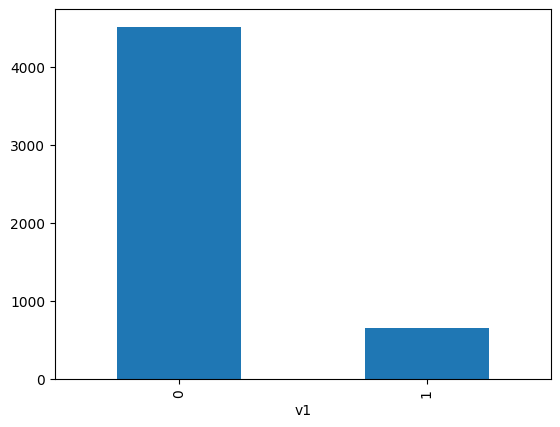

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
urllib.request.urlretrieve('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', filename='spam.csv')
data = pd.read_csv('spam.csv', encoding='latin1')
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data.drop_duplicates(subset=['v2'], inplace=True)
data['v1'].value_counts().plot(kind='bar')
X_data = data['v2']
y_data = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
vocab_size = len(word_to_index) + 1
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)

In [16]:

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [17]:

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8244 - loss: 0.4517 - val_acc: 0.9625 - val_loss: 0.2003
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9449 - loss: 0.1752 - val_acc: 0.9637 - val_loss: 0.1122
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9783 - loss: 0.0770 - val_acc: 0.9831 - val_loss: 0.0691
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9871 - loss: 0.0523 - val_acc: 0.9843 - val_loss: 0.0655


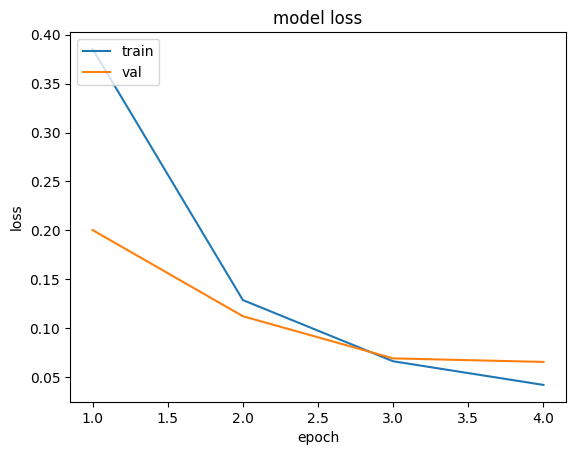

In [18]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.save('model.h5')

In [20]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9856 - loss: 0.0637

 테스트 정확도: 0.9826


In [21]:
from googletrans import Translator
translator = Translator()
def toEng(text):
    return translator.translate(text, dest="en").text

In [27]:
test_data = [toEng("안녕하세요. 당신의 의자가 불편하십니까? 단돈 200달러에 모든것이 구매 가능합니다. 11개월동안 무료로 해드립니다.")]
print(test_data)
test = tokenizer.texts_to_sequences(test_data)
test = pad_sequences(test, maxlen = max_len)
print(model.predict(test))

['hello.Are your chairs uncomfortable?Everything can be purchased for just 200 dollars.Free for 11 months.']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.07619724]]
